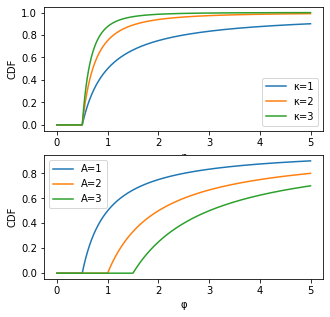

In [23]:
# Difference between /kappa and A
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto
ϕlb = 0.5 #scale
κ_values = [1, 2, 3] #list of values of shape parameters
A_values = [1, 2, 3] #list of values of shape parameters
φ_values = np.linspace(start=0, stop=5, num=1000)


figure, axs = plt.subplots(2)
for κ in κ_values:
    output = np.array([pareto.cdf(x=φ_values, b=κ, loc=0, scale=ϕlb)])
    axs[0].plot(φ_values, output.T, label=f'κ='+str(κ))
    axs[0].legend()
κ=1
for A in A_values:
    output = np.array([pareto.cdf(x=φ_values/A, b=κ, loc=0, scale=ϕlb)])
    axs[1].plot(φ_values, output.T, label='A='+str(A))
    axs[1].legend()


for ax in axs.flat:
    ax.set(xlabel='φ', ylabel='CDF')

plt.show()


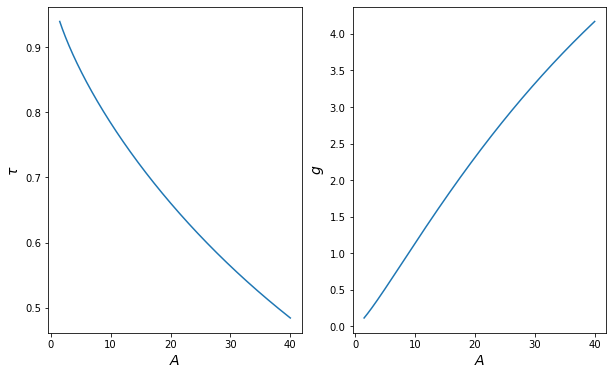

In [41]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

A_vals = np.linspace(1.5,40,1000)
τ_vals = np.zeros(1000)
g_vals = np.zeros(1000)

α = 0.8
β = 0.3
γ = 0.5
αβ = α*β
U = 3
def solve_foc(unsolved_vals):
    τ,g=unsolved_vals[0],unsolved_vals[1]
    return [
        (1-τ)-g*((τ**((1-α)*β))/((U-g**(1-γ))**(1-α)*(A**β)))**(1/(1-α+αβ))*(1/(1-α+αβ))*(1-α*(1-β)*τ),
        (1-α+αβ)*(A/(τ**(1-α)))**(β/(1-α+αβ))*(U-g**(1-γ))**(-αβ/(1-α+αβ))-((1-α+αβ)/(1-γ))*g**γ-(g/(U-g**(1-γ))),
    ]

for i in range(1000):
    A = A_vals[i]
    τ_t,g_t=fsolve(solve_foc,[1,1])
    τ_vals[i]=τ_t
    g_vals[i]=g_t
    
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.plot(A_vals,τ_vals)
ax1.set_xlabel('$A$', fontsize=14)
ax1.set_ylabel('$τ$', fontsize=14)

ax2.plot(A_vals,g_vals)
ax2.set_xlabel('$A$', fontsize=14)
ax2.set_ylabel('$g$', fontsize=14)

plt.show()

In [3]:
###Parameters###
α = 0.99
β = 0.3
γ = 0.8
αβ = α*β
U = 3
A = 1.5
g = 1
################
τ_vals=np.linspace(0,1,100)

fig, ax = plt.subplots()
ax.plot(τ_vals, 1-τ_vals, 'b-', linewidth=2)

for A in [4,5]:
    y = lambda τ: g*((τ**((1-α)*β))/((U-g**(1-γ))**(1-α)*(A**β)))**(1/(1-α+αβ))*(1/(1-α+αβ))*(1-α*(1-β)*τ)
    lb = f'A= {A}'
    ax.plot(τ_vals,y(τ_vals),label=lb)
ax.legend()
ax.set_xlabel('$τ$', fontsize=14)
plt.show()


In [75]:
### Imperfect Mobility
# ！！！！pip install mystic
from mystic.solvers import fmin_powell

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
###Parameters###
α = 0.99
β = 0.3
γ = 0.8
αβ = α*β
A = 5
U = 2
θ = 0.5 #Note that this is the inverse of elasticity of migration
################
# Let x be a four-element tuple: x[0]=g, x[1]=\tau, x[2]=w and x[3]=L
fun = lambda x: -((1-α+αβ)/α)*x[1]*x[3] + x[1]*x[3]
cons = ({'type': 'eq', 'fun': lambda x:  U*(x[3]**θ) - A**(-β/(1-α))*x[2]**((1-α+αβ)/(1-α))*x[1]**β-x[0]**(1-γ)},
        {'type': 'eq', 'fun': lambda x:  U*A**((θ+β)/(1-α))*(α/(1-α+αβ*x[1]))**θ-x[2]**((1-α+αβ+θ)/(1-α))*x[1]**β-x[0]**(1-γ)*A**(β/(1-α))*x[2]**(θ/(1-α))})

#bnds = ((0, 4), (0, 1),(0, 10),(0, 1000))
res = minimize(fun, (1, 0.6, 1, 1),  constraints=cons)

<ipython-input-75-6bc38556b813>:19: RuntimeWarning: invalid value encountered in double_scalars
  cons = ({'type': 'eq', 'fun': lambda x:  U*(x[3]**θ) - A**(-β/(1-α))*x[2]**((1-α+αβ)/(1-α))*x[1]**β-x[0]**(1-γ)},
<ipython-input-75-6bc38556b813>:20: RuntimeWarning: invalid value encountered in double_scalars
  {'type': 'eq', 'fun': lambda x:  U*A**((θ+β)/(1-α))*(α/(1-α+αβ*x[1]))**θ-x[2]**((1-α+αβ+θ)/(1-α))*x[1]**β-x[0]**(1-γ)*A**(β/(1-α))*x[2]**(θ/(1-α))})


In [76]:
res

     fun: 3911259134.41364
     jac: array([0.0000000e+00, 6.4000000e+01, 0.0000000e+00, 2.5216768e+07])
 message: 'Singular matrix C in LSQ subproblem'
    nfev: 148
     nit: 26
    njev: 26
  status: 6
 success: False
       x: array([6.88103637e+06, 3.65514615e+07, 1.00000000e+00, 1.55105191e+02])

     fun: 9.053758419287699e+32
     jac: array([0.00000000e+00, 6.02913040e+07, 0.00000000e+00, 1.93428131e+25])
 message: 'Singular matrix C in LSQ subproblem'
    nfev: 325
     nit: 60
    njev: 60
  status: 6
 success: False
       x: array([1.32695503e+21, 1.50166903e+25, 1.00000000e+00, 8.73914948e+07])

In [56]:
x=res.x
U*(x[3]**θ) - A**(-β/(1-α))*x[2]**((1-α+αβ)/(1-α))*x[1]**β-x[0]**(1-γ)

0.0017223289119544342

In [57]:
U*A**((θ+β)/(1-α))*(α/(1-α+αβ*x[1]))**θ-x[2]**((1-α+αβ+θ)/(1-α))*x[1]**β-x[0]**(1-γ)*A**(β/(1-α))*x[2]**(θ/(1-α))

15.54915315755278